In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd

%matplotlib inline

In [67]:
color_cycle = cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the final scores

In [4]:
scores = pd.read_csv('Game of Game of Thrones.csv', skipinitialspace=True)
scores.columns = scores.columns.str.strip()

Check that the data loaded correctly.

In [5]:
scores.head()

,Name,Violence,Sex/Nudity,Wits,Status,Food,Total,Team,Draft round
0,Alys Karstark,0,0,0,0,0,0,It was a Stark and Dorney Night (GM),10.0
1,Arya Stark,190,35,110,40,10,385,Roon of the Ancients (Liz),1.0
2,Beric Dondarrion,100,0,0,100,10,210,The Watcher on the Couch (Imogen),6.0
3,Bran Stark,0,0,60,300,0,360,We Do Not Sew (Ed),3.0
4,Brienne of Tarth,50,20,15,90,10,185,Roon of the Ancients (Liz),3.0


# Results by team
Imogen beat us by quite a lot.

In [7]:
scores.groupby(by='Team').sum().sort_values(by=['Total'],ascending=False)

,Violence,Sex/Nudity,Wits,Status,Food,Total,Draft round
Team,,,,,,,
The Watcher on the Couch (Imogen),750,0,180,545,40,1515,55.0
Roon of the Ancients (Liz),415,55,275,370,50,1165,55.0
We Do Not Sew (Ed),485,25,135,445,40,1130,55.0
It was a Stark and Dorney Night (GM),405,55,30,305,60,855,55.0
The real game of thrones was the friends we made along the way (Dan C),405,55,125,175,60,820,55.0
Not drafted,0,0,0,80,0,80,0.0


# Scores by draft round
Did the highest scoring characters get drafted earlier?

Mostly. The second round draft was (very slightly) worse than the third round. Apart from that, on average, we picked higher scoring characters earlier.

In [12]:
scores.groupby(by='Draft round').mean()

,Violence,Sex/Nudity,Wits,Status,Food,Total
Draft round,,,,,,
1.0,145,7,52,60,10,274
2.0,94,9,37,35,12,187
3.0,17,10,37,115,12,191
4.0,108,0,2,10,2,122
5.0,45,8,7,42,6,108
6.0,36,1,9,41,8,95
7.0,27,0,3,26,0,56
8.0,10,3,2,12,0,27
9.0,0,0,0,19,0,19


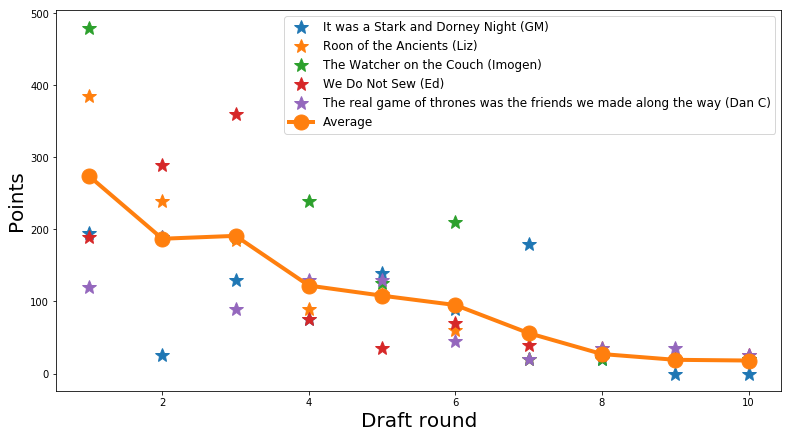

In [65]:
plt.figure(figsize=(13,7))
for i in range(5):
    scores_subset = scores.loc[scores['Team'] == scores.Team.unique()[i]]
    plt.plot(scores_subset['Draft round'],
            scores_subset['Total'], '*',
             label=scores.Team.unique()[i], ms=15)
         
plt.plot(np.arange(1,11), scores.groupby(by='Draft round').mean()['Total'], 'o-', color='C1', ms=15, linewidth=4,
        label='Average')
plt.legend(fontsize=12)
plt.ylabel('Points', fontsize=20)
plt.xlabel('Draft round', fontsize=20);

Do it again, but with character names as the markers.

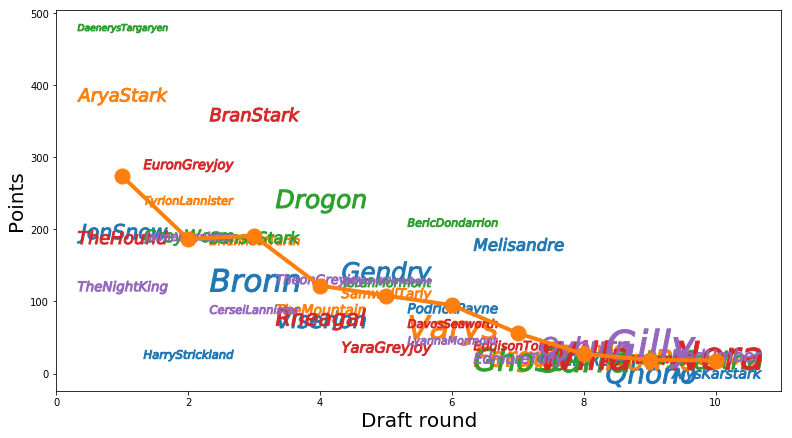

In [68]:
plt.figure(figsize=(13,7))
for i in range(5):
    scores_subset = scores.loc[scores['Team'] == scores.Team.unique()[i]]
    for j in range(10):
        plt.plot(scores_subset['Draft round'].values[j],
                scores_subset['Total'].values[j],
                marker=r"$ {} $".format(scores_subset['Name'].values[j]), ms=90, color=color_cycle[i])
         

plt.plot(np.arange(1,11), scores.groupby(by='Draft round').mean()['Total'], 'o-', color='C1', ms=15, linewidth=4,
        label='Average')
plt.xlim(0,11)
plt.ylabel('Points', fontsize=20)
plt.xlabel('Draft round', fontsize=20);

Melisandre was an exceptional 7th round pick!

# Traits for each character
A sunburst plot showing how each character earned their points. The slightly opaque blue area represents the average score in that trait.

In [157]:
def sunburst(name, constant_scale=False):

#     name = 'Arya Stark'

    N = 5
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    radii = scores.loc[scores['Name'] == name].drop(columns=['Name', 'Total', 'Team', 'Draft round']).values[0]
    width = np.pi / 5*np.ones(N)
    colors = plt.cm.viridis(radii / 200)

    radii_average = scores.drop(columns=['Name', 'Total', 'Team', 'Draft round']).mean(axis=0)
    width_average = 1.5*np.pi / 5*np.ones(N)
    colors_average = 'C0'

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, projection='polar')
    ax.bar(theta, radii_average, width=width_average, bottom=0.0, color=colors_average, alpha=0.2)

    ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=1)


    if constant_scale:
        ax.set_ylim(0,300)
    plt.xticks(theta, ['Violence','Sex/Nudity','Wits','Status','Food'], fontsize=20)
    plt.title('Team: {0}'.format(scores.loc[scores['Name'] == name]['Team'].values[0]), fontsize=30)


In [158]:
ipywidgets.interact(sunburst, name=ipywidgets.Dropdown(options=scores.Name, description='Character name'))

interactive(children=(Dropdown(description='Character name', options=('Alys Karstark', 'Arya Stark', 'Beric Dondarrion', 'Bran Stark', 'Brienne of Tarth', 'Bronn', 'Cersei Lannister', 'Daenerys Targaryen', 'Davos Seaworth', 'Drogon', 'Ebrose', 'Eddison Tollett\xa0', 'Edmure Tully', 'Euron Greyjoy', 'Fergus', 'Gendry', 'Ghost', 'Gilly', 'Grey Worm', 'Harry Strickland', 'Hot Pie', 'Jaime Lannister', 'Jon Snow', 'Jorah Mormont', 'Lyanna Mormont', 'Martha', 'Meera Reed', 'Melisandre', 'Missandei', 'Ned Umber\xa0', 'Nora', 'Nymeria (wolf)', 'Podrick Payne', 'Qhono', 'Qyburn', 'Rheagal', 'Robett Glover', 'Robin Arryn', 'Samwell Tarly', 'Sansa Stark', 'Sarra', 'The Hound', 'The Mountain', 'The Night King', 'Theon Greyjoy', 'Tormund Giantsbane', 'Tycho Nestoris', 'Tyrion Lannister', 'Varys', 'Viserion', 'Willa', 'Wolkan', 'Yara Greyjoy', 'Yohn Royce'), value='Alys Karstark'), Checkbox(value=False, description='constant_scale'), Output()), _dom_classes=('widget-interact',))

<function __main__.sunburst>